# Requirements

In [1]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import missingno as msno

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('mental_health_diagnosis_treatment_data.csv')
df = data.copy()

In [3]:
df.sample(5)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
81,82,23.0,Male,Major Depressive Disorder,6,6,6,6.0,Benzodiazepines,Interpersonal Therapy,2024-02-21,15,7.0,No Change,8,Excited,86
399,400,33.0,Male,Generalized Anxiety,8,4,4,5.0,Antidepressants,Mindfulness-Based Therapy,2024-01-07,8,7.0,Improved,10,Happy,69
282,283,52.0,Male,Major Depressive Disorder,8,3,5,1.0,SSRIs,Dialectical Behavioral Therapy,2024-02-14,13,9.0,Deteriorated,9,Stressed,81
306,307,51.0,Female,Bipolar Disorder,10,3,9,1.0,Benzodiazepines,Cognitive Behavioral Therapy,2024-01-10,8,8.0,Deteriorated,6,Happy,80
268,269,35.0,Female,Major Depressive Disorder,8,4,6,3.0,Benzodiazepines,Interpersonal Therapy,2024-02-01,8,NaN,No Change,10,Stressed,82


Preprocess the input and the output variables appropriately.

In [4]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    500 non-null    int64  
 1   Age                           475 non-null    float64
 2   Gender                        500 non-null    object 
 3   Diagnosis                     500 non-null    object 
 4   Symptom Severity (1-10)       500 non-null    int64  
 5   Mood Score (1-10)             500 non-null    int64  
 6   Sleep Quality (1-10)          500 non-null    int64  
 7   Physical Activity (hrs/week)  450 non-null    float64
 8   Medication                    500 non-null    object 
 9   Therapy Type                  500 non-null    object 
 10  Treatment Start Date          500 non-null    object 
 11  Treatment Duration (weeks)    500 non-null    int64  
 12  Stress Level (1-10)           400 non-null    float64
 13  Outco

In [6]:
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


In [7]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [8]:
encoder = LabelEncoder()
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])

In [9]:
encoder = LabelEncoder()
df['Medication'] = encoder.fit_transform(df['Medication'])

In [10]:
encoder = LabelEncoder()
df['Therapy Type'] = encoder.fit_transform(df['Therapy Type'])

In [11]:
encoder = LabelEncoder()
df['AI-Detected Emotional State'] = encoder.fit_transform(df['AI-Detected Emotional State'])

In [12]:
encoder = LabelEncoder()
df['Outcome'] = encoder.fit_transform(df['Outcome'])

Explore the dataset using visualizations of your choice.

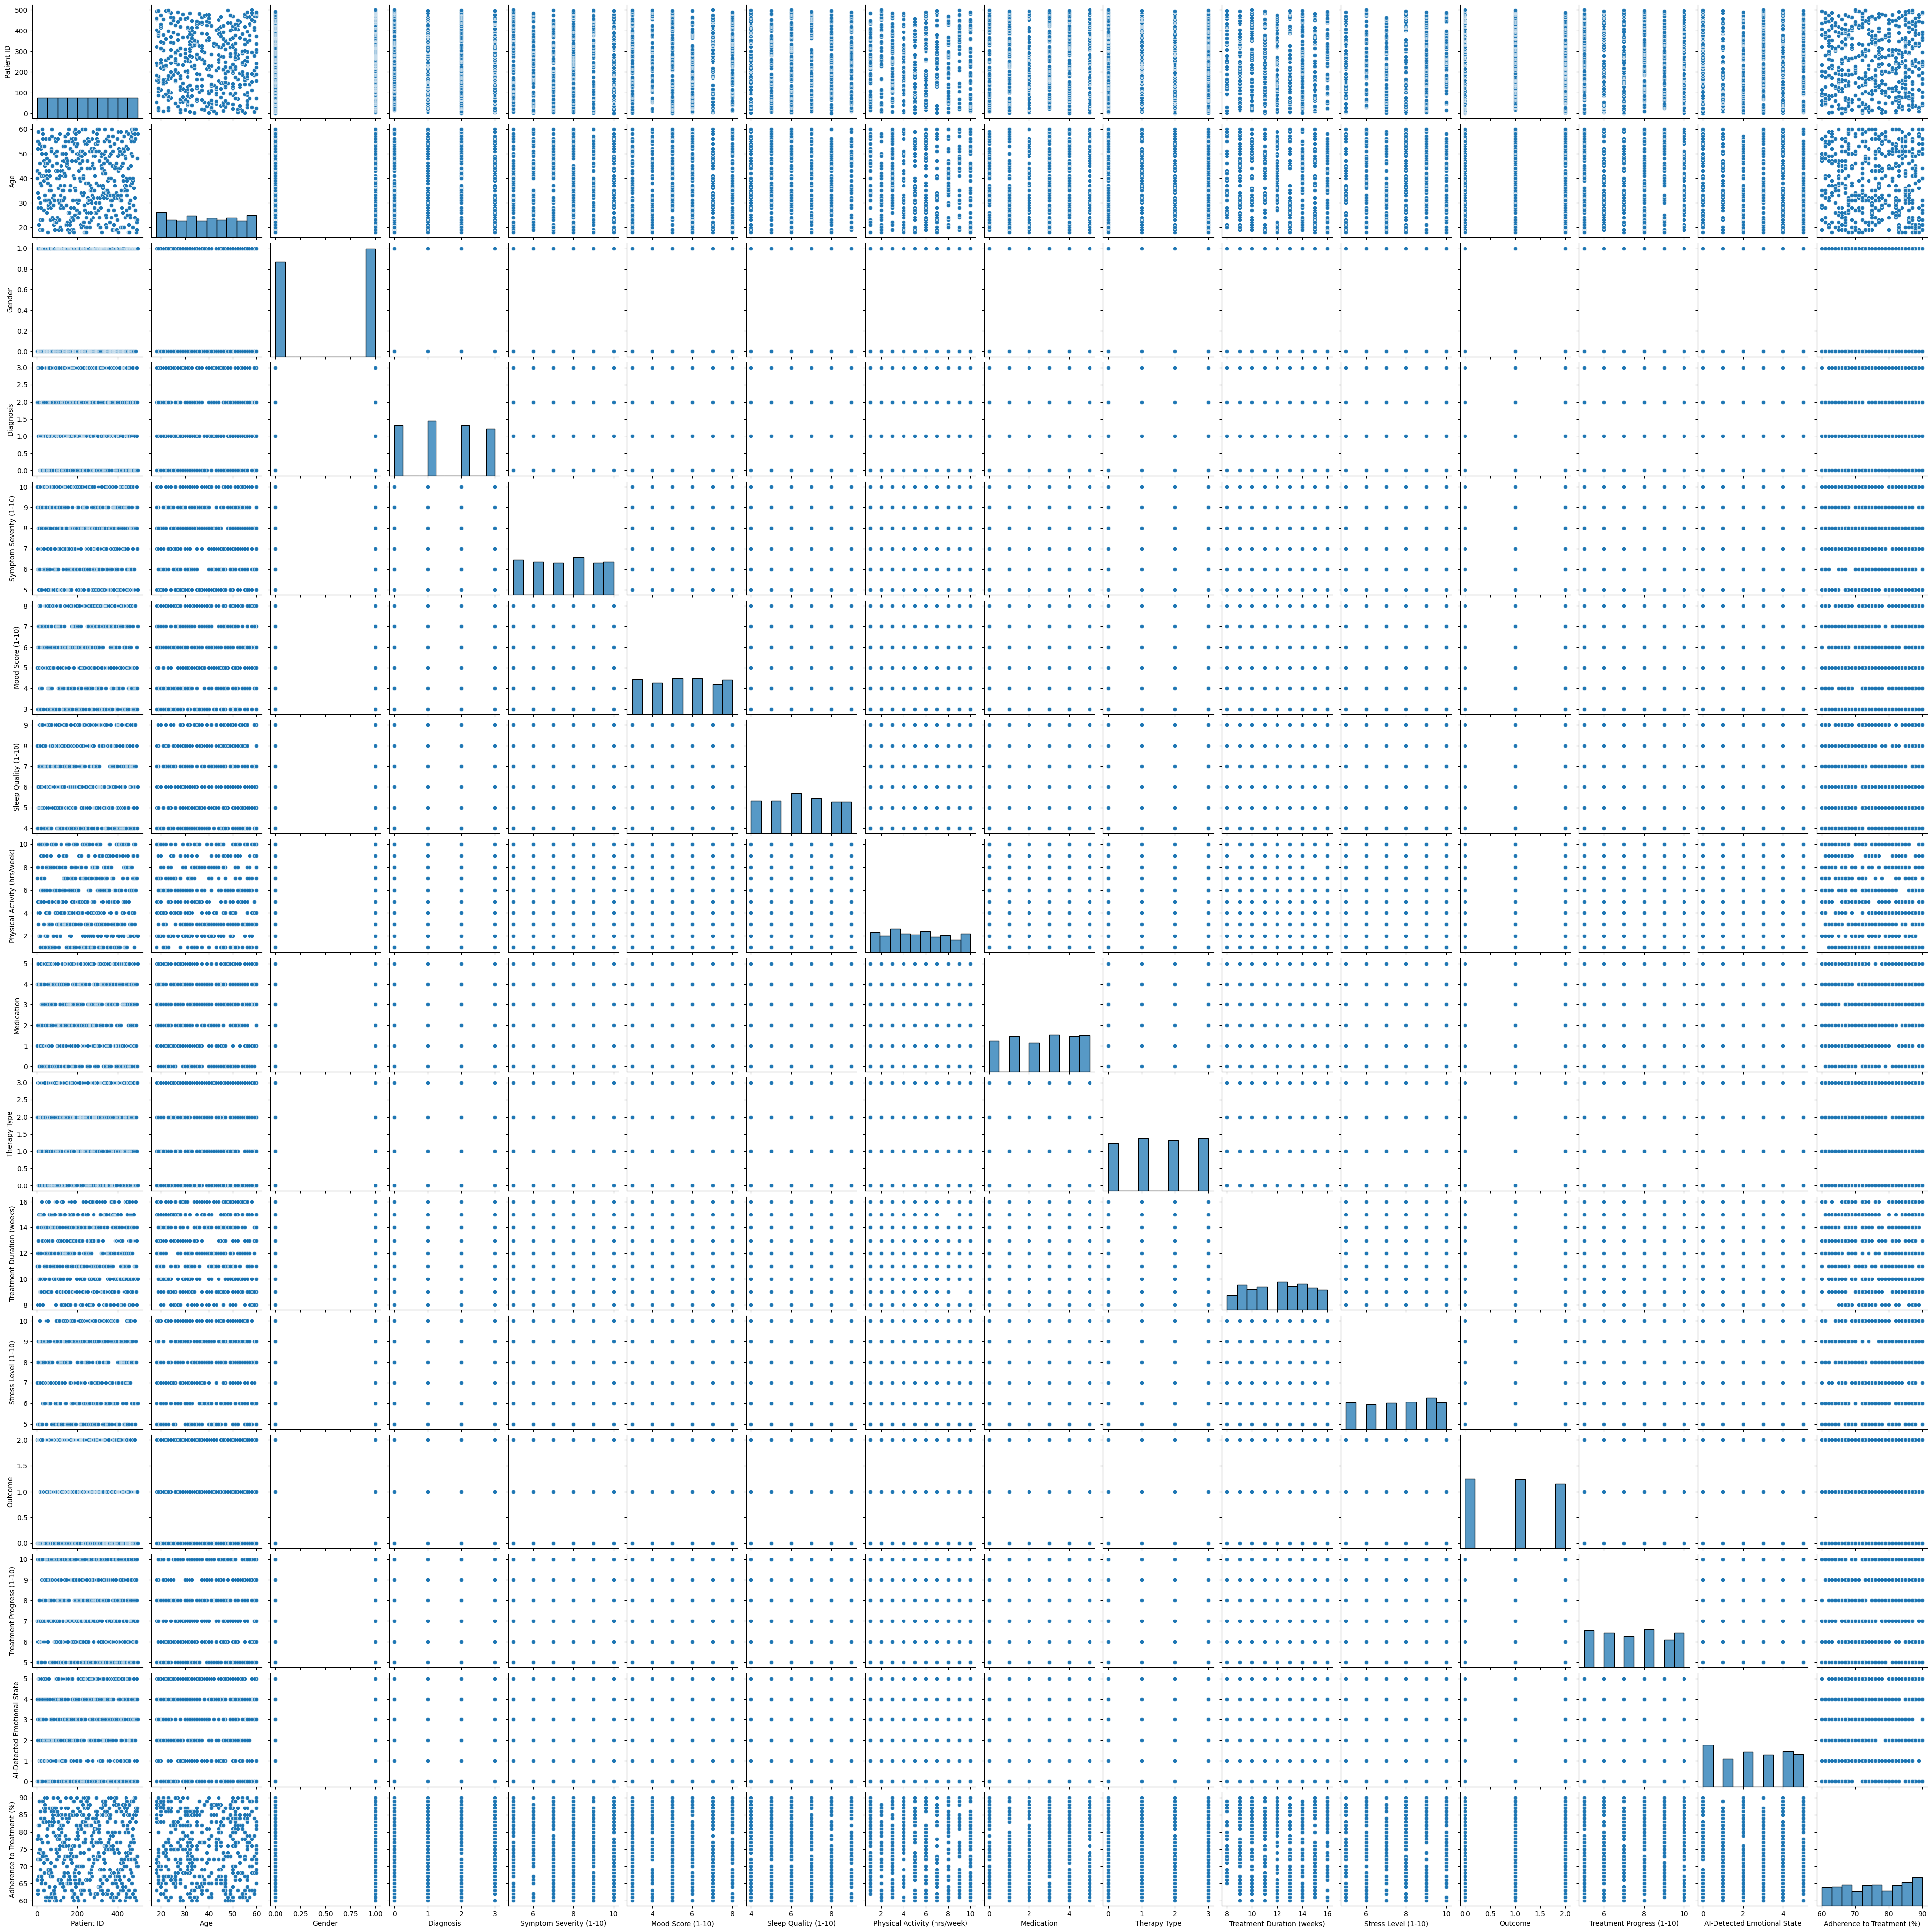

In [13]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

Check if the dataset is balanced.

<Axes: >

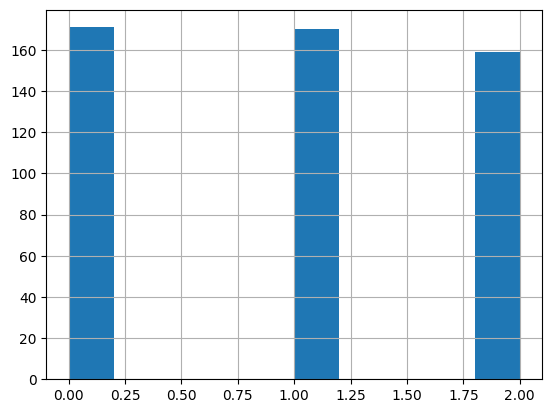

In [14]:
# Write your code here. Add as many boxes as you need.
df['Outcome'].hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [16]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

Patient ID                       0.0
Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Start Date             0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

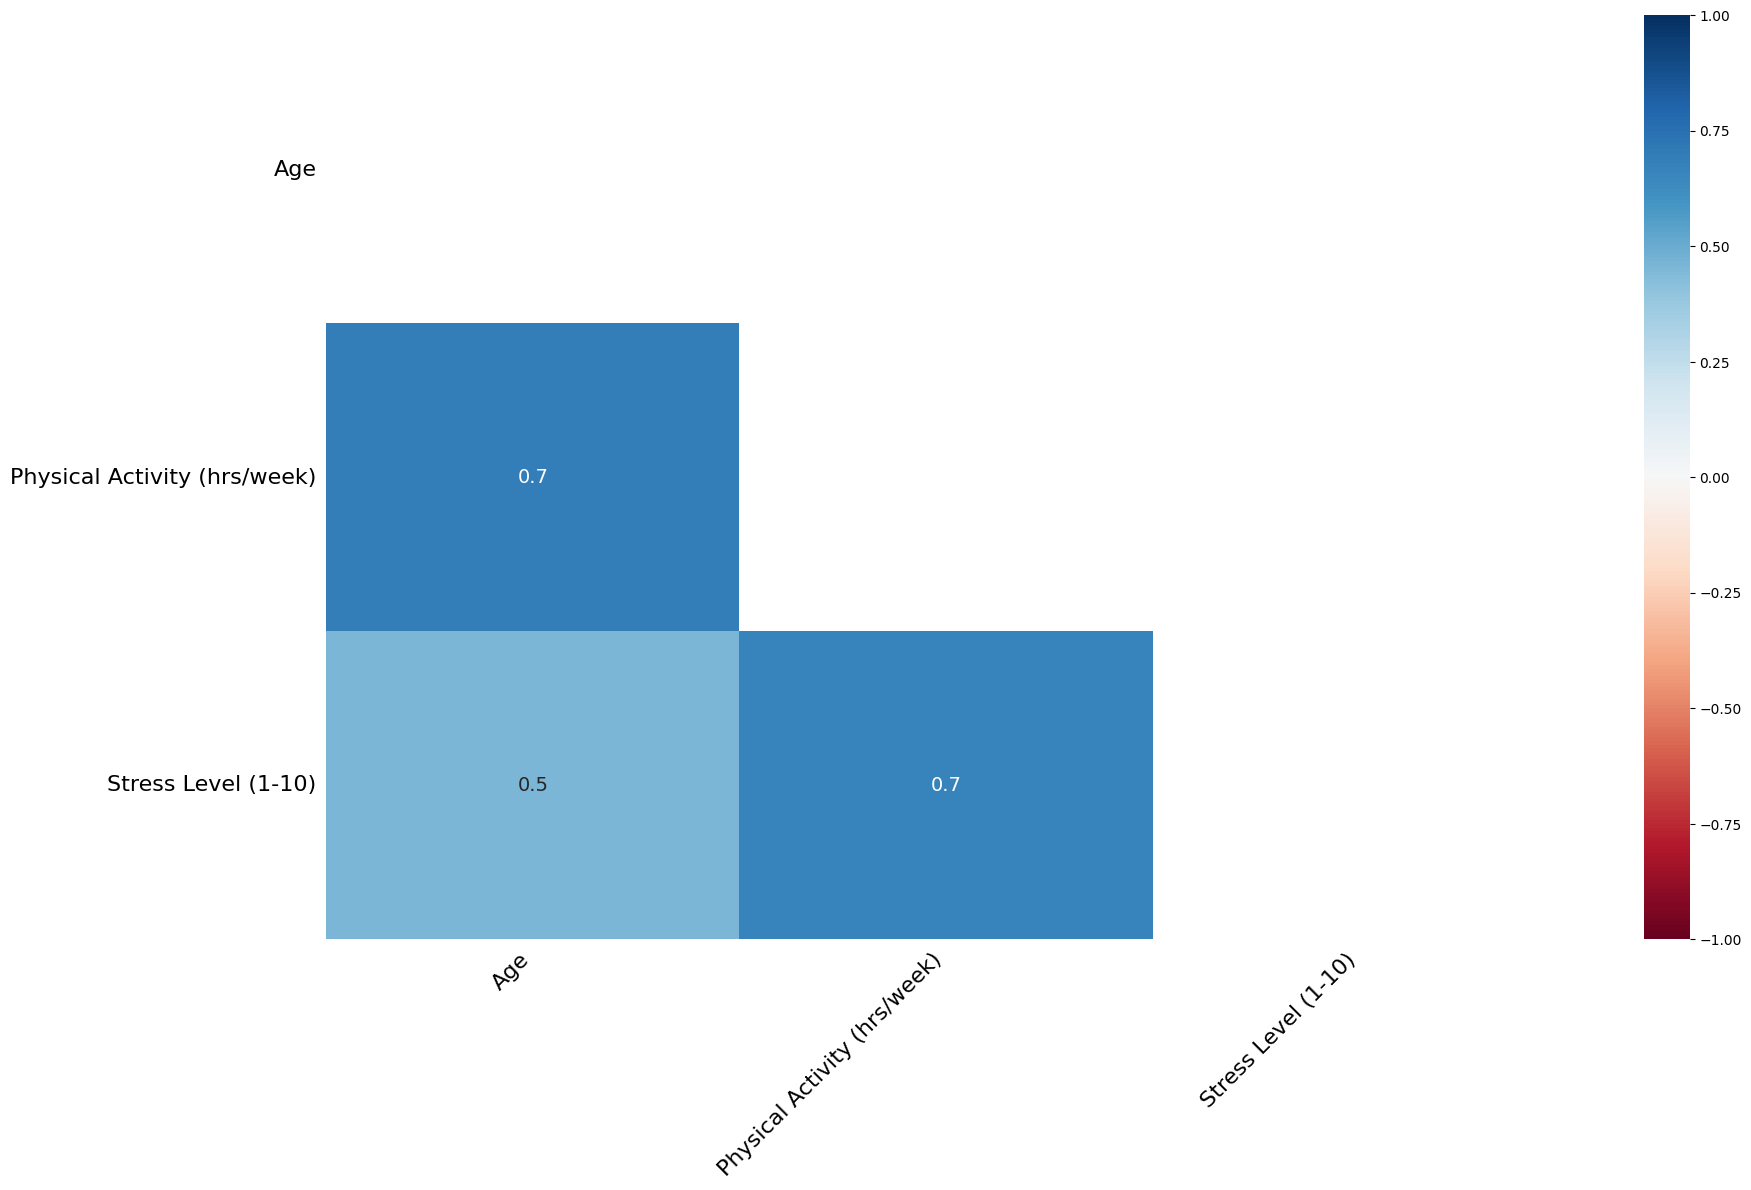

In [17]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [18]:
# Write your code here. Add as many boxes as you need.
df.Age = df.Age.fillna(df.Age.mean())

In [20]:
knn_imputer = KNNImputer(n_neighbors=5)
df['Physical Activity (hrs/week)'] = knn_imputer.fit_transform(df['Physical Activity (hrs/week)'].to_numpy().reshape(-1, 1))

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)
df['Stress Level (1-10)'] = knn_imputer.fit_transform(df['Stress Level (1-10)'].to_numpy().reshape(-1, 1))

In [22]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [26]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
df = df.drop(['Treatment Start Date'],axis=1)
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

## Feature Scaling
Standardize the features appropriately.

In [27]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           500 non-null    float64
 1   Gender                        500 non-null    int64  
 2   Diagnosis                     500 non-null    int64  
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  500 non-null    float64
 7   Medication                    500 non-null    int64  
 8   Therapy Type                  500 non-null    int64  
 9   Treatment Duration (weeks)    500 non-null    int64  
 10  Stress Level (1-10)           500 non-null    float64
 11  Outcome                       500 non-null    int64  
 12  Treatment Progress (1-10)     500 non-null    int64  
 13  AI-De

## Model Selection

Choose and train an approriate model for the given task.

In [30]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)

In [31]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [32]:
# Write your code here. Add as many boxes as you need.
Y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [37]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.34      0.50      0.41        28
           1       0.48      0.40      0.44        40
           2       0.42      0.34      0.38        32

    accuracy                           0.41       100
   macro avg       0.42      0.41      0.41       100
weighted avg       0.42      0.41      0.41       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [38]:
# Write your code here. Add as many boxes as you need.
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)

## Feature Scaling
Standardize the features appropriately.

In [39]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [73]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
kf = KFold(n_splits=5)
kf.get_n_splits(X, Y)

5

In [74]:
param_grid = {
    'n_estimators': [100, 50, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],         
}

In [75]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [76]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 50, 150]})

In [77]:
best_model = cv.best_estimator_

In [78]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [79]:
# Write your code here. Add as many boxes as you need.
Y_pred = best_model.predict(X_test)

In [80]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.32      0.33      0.32        18
           1       0.47      0.37      0.41        19
           2       0.06      0.08      0.07        13

    accuracy                           0.28        50
   macro avg       0.28      0.26      0.27        50
weighted avg       0.31      0.28      0.29        50



In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred,average='micro'))
print(f1_score(Y_test,Y_pred,average='macro'))

[[6 3 9]
 [8 7 4]
 [6 4 3]]
0.32
0.31564281655025755
